## Распаковка датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import py7zr
import os

In [2]:
data_folder = "../data/raw" 

# Получаем список файлов в папке с данными
file_list = os.listdir(data_folder)

# Проходимся по файлам
for file_name in file_list:
    file_path = os.path.join(data_folder, file_name)
    

# Проверяем, является ли файл архивом 7z
if file_path.endswith('.7z'):
    with py7zr.SevenZipFile(file_path, 'r') as zip_ref:
        # Извлечь все файлы из архива в папку с данными
        zip_ref.extractall(data_folder)
        print(f"Извлечены файлы из {file_name}")
else:
    print(f"Файл {file_name} не является файлом .7z.")

Файл sample_submission.csv не является файлом .7z.


## Исследование датасета

In [3]:
train = pd.read_csv("../data/raw/train.csv")
test=pd.read_csv("../data/raw/test.csv")
members=pd.read_csv("../data/raw/members.csv")
songs=pd.read_csv("../data/raw/songs.csv")
print('train',train.shape)
print('test',test.shape)
print('members',members.shape)
print('songs',songs.shape)

train (7377418, 6)
test (2556790, 6)
members (34403, 7)
songs (2296320, 7)


In [4]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [14]:
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


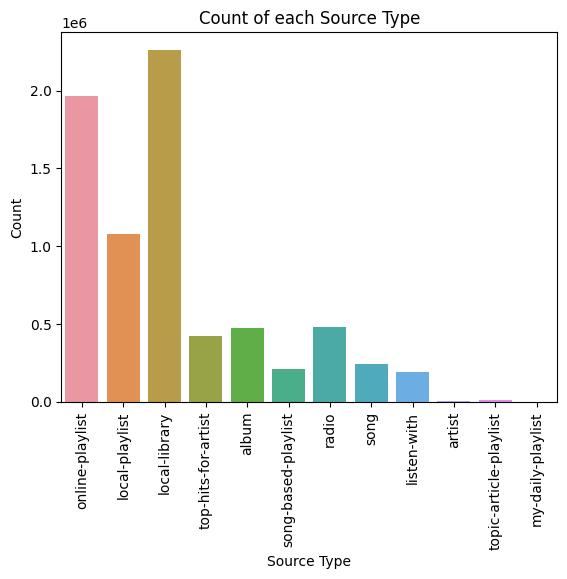

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='source_type', data=train)

plt.title('Count of each Source Type')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

Из визуализации мы видим, что локальная библиотека более предпочтительна, чем любые другие типы источников, после этого онлайн-плейлист, локальный плейлист и другие функции оказываются менее важными

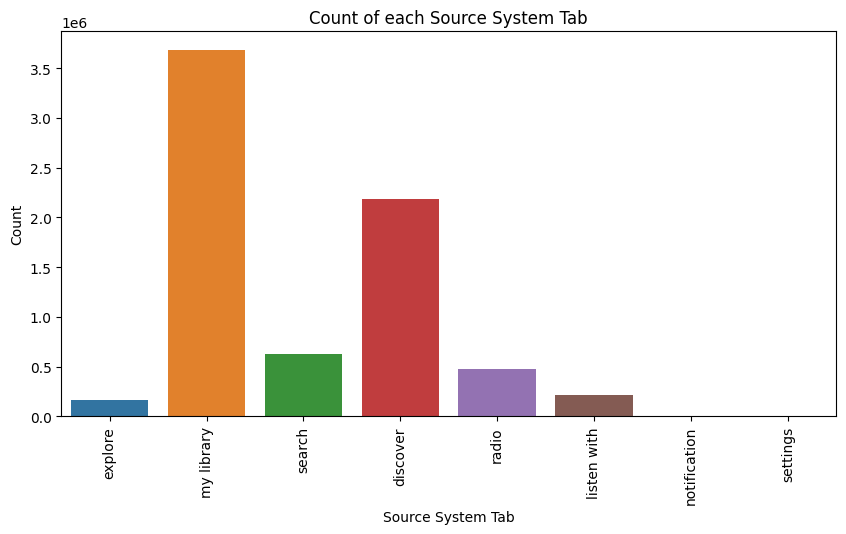

In [6]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x='source_system_tab', data=train)

plt.title('Count of each Source System Tab')
plt.xlabel('Source System Tab')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

Из графика видно, что большинство пользователей возвращаются к песням через мою библиотеку, а не ищут их через поисковую строку, что означает, что есть разные источники, к которым они могут вернуться, но наиболее предпочтительным является моя библиотека

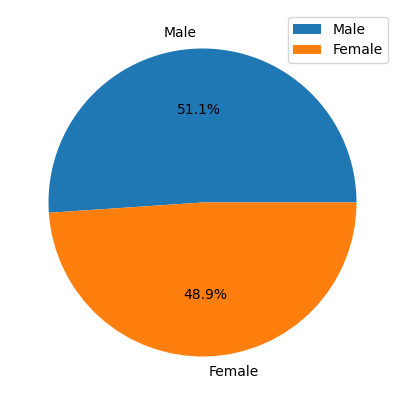

In [10]:
labels = ['Male','Female']
plt.figure(figsize=(10,5))
sizes = pd.value_counts(members.gender)
plt.pie(sizes,labels=labels,autopct='%1.1f%%')

plt.legend()
plt.show()

Пользователей мужского пола больше, чем женского на три процента.

Топ 20 самых прослушиваемых песен

In [13]:
top_20_songs = train['song_id'].value_counts().head(20)

print(top_20_songs)

reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    13973
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    13293
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    13079
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    12855
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    12004
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=    11835
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=    11745
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=    11521
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=    11131
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=    10791
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=    10565
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=    10500
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     9908
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     9844
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     9736
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     9244
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     9038
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     8883
8Ckw1wek5d6oEsNUoM4P5iag86Ta

## Небольшой препроцессинг данных для дальнейшего использования

In [16]:
# Выборка только половины данных
df = train.sample(frac=0.5)

In [5]:
# Загрузка и объединение данных песен
songs = pd.read_csv('../data/raw/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Загрузить и присоединиться к данным участников
members = pd.read_csv('../data/raw/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 534.7+ MB


In [7]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688649e+06,3.688634e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.037768e-01,2.451625e+05,1.860113e+01,7.513384e+00,1.754243e+01,6.793849e+00,2.012812e+07,2.017157e+07
std,4.999858e-01,6.746004e+04,2.117203e+01,6.642662e+00,2.152135e+01,2.275836e+00,3.017218e+04,3.874151e+03
min,0.000000e+00,1.950000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.418590e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721950e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,1.079997e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


анализ уникальных значений в датасете

In [8]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27553,1589206,0.430830
gender,object,2,1480642,0.401398
composer,object,59517,838663,0.227359
source_screen_name,object,20,207575,0.056273
genre_ids,object,518,59275,0.016069
source_system_tab,object,8,12453,0.003376
source_type,object,12,10752,0.002915
language,float64,10,75,0.000020
song_length,float64,49828,60,0.000016
artist_name,object,32287,60,0.000016


Filling Null Values

In [9]:
# строки с  'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
# Числа со средним значением    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [10]:
df.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [11]:
# парсинг даты
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [12]:
# преобразование категориальных данных
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [13]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,YzJG6KZMPTc8GpZOeAfbAwpXsT5hxr2t2KUzn1gPLb0=,uiba5Wfgu76AKOJ2gDNMQHgqQbnfGwr56+ilxA07Se4=,my library,Local playlist more,local-playlist,0,266762.0,437,Hoshino Gen (星野源),星野源,...,male,3,2015-02-24,2018-07-15,2015,2,24,2018,7,15
1,S95uvDPw0Cr3M7hzik7T3KHjqGYNNSNqLSLTdHZ44Yk=,t7U3iloQJP4XkIkRRaEr1LuHeWeWpSLTtIVD3OpluDU=,search,Album more,album,0,213028.0,465,G.E.M.鄧紫棋,Peter Roberts,...,female,9,2014-11-06,2017-10-05,2014,11,6,2017,10,5
2,o4EnGvgX9K8pwI9KX888y/RtbMk75eCrVY/KLHQ4H4s=,gu/lHDjq6qqpU7r3CQkvRpGF9kqc2Mrn9CZhb7jrFvY=,discover,Online playlist more,song-based-playlist,0,226899.0,465,Redfoo,unknown,...,female,3,2015-09-22,2017-10-02,2015,9,22,2017,10,2
3,yu0B7nXKUl2pb3dZaqpKwuTn/DDXmW2bl+AYzr0M68g=,adoXBCoA5CbnZXJzkEqMKAtOoqtSYH2rLLXsJE5+2yU=,my library,Local playlist more,local-playlist,0,284029.0,465,Michael Learns To Rock,unknown,...,male,9,2004-03-26,2017-10-10,2004,3,26,2017,10,10
4,uQ6LOBwmu7lIjv+wFaq5+M4IcAZEha2J0uyDB6Y8aqY=,tpsX+zae7W9+0Y/hpsAJBpQLxvctzbEUeTkYPCpf040=,discover,unknown,online-playlist,0,288287.0,465,陳奕迅 (Eason Chan),小柯,...,female,3,2014-11-04,2017-09-20,2014,11,4,2017,9,20


In [14]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

Save dataframes

In [15]:
df.to_csv('../data/interim/train_cleaned.csv', index=False)